In [1]:
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
#opening data
import os
import pathlib
import warnings
#used for plots
from mplsoccer import Pitch
from scipy.stats import binned_statistic_2d

In [17]:
df1 = pd.read_csv("../event/Generated_data/BayernLeverKusen.csv")

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_78970/4128072997.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,45,46,50,51,52,53,55,56,57,58,59,60,61,62,63,65,66,67,68,69,71,72,73,74,75,76,87,88,89,90,91,92,93,94,95,96,97,98,100,101,102,104,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("../event/Generated_data/BayernLeverKusen.csv")


In [18]:
import ast  

df_pass = df1[df1['type'] == 'Pass']
df_pass['location'] = df_pass['location'].apply(ast.literal_eval)
df_pass['pass_end_location'] = df_pass['pass_end_location'].apply(ast.literal_eval)
df_pass['x_start'] = df_pass['location'].apply(lambda x: x[0])
df_pass['y_start'] = df_pass['location'].apply(lambda x: x[1])
df_pass['x_end'] = df_pass['pass_end_location'].apply(lambda x: x[0])
df_pass['y_end'] = df_pass['pass_end_location'].apply(lambda x: x[1])

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_78970/1255546577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['location'] = df_pass['location'].apply(ast.literal_eval)
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_78970/1255546577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['pass_end_location'] = df_pass['pass_end_location'].apply(ast.literal_eval)
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_78970/1255546577.py:6: SettingWithCopyWarning: 

In [19]:
df_carry = df1[df1['type'] == 'Carry']
df_carry['location'] = df_carry['location'].apply(ast.literal_eval)
df_carry['carry_end_location'] = df_carry['carry_end_location'].apply(ast.literal_eval)
df_carry['x_start'] = df_carry['location'].apply(lambda x: x[0])
df_carry['y_start'] = df_carry['location'].apply(lambda x: x[1])
df_carry['x_end'] = df_carry['carry_end_location'].apply(lambda x: x[0])
df_carry['y_end'] = df_carry['carry_end_location'].apply(lambda x: x[1])

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_78970/3623361675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carry['location'] = df_carry['location'].apply(ast.literal_eval)
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_78970/3623361675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carry['carry_end_location'] = df_carry['carry_end_location'].apply(ast.literal_eval)
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_78970/3623361675.py:4: SettingWithCopyWar

In [20]:
move_df = pd.concat([df_pass, df_carry]).sort_values(by='index')
move_df.head()

,Unnamed: 0,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,...,tactics,team,team_id,timestamp,type,under_pressure,x_start,y_start,x_end,y_end
204,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Werder Bremen,176,00:00:03.417,Pass,NaN,61.0,40.1,59.0,40.9
35968,35968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Darmstadt 98,872,00:00:00.362,Pass,NaN,61.0,40.1,34.2,39.2
34806,34806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:00:00.817,Pass,NaN,60.0,40.0,43.8,39.2
33679,33679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Bayer Leverkusen,904,00:00:00.913,Pass,NaN,60.0,40.0,35.9,39.4
32370,32370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Werder Bremen,176,00:00:00.986,Pass,NaN,60.0,40.0,36.2,27.7


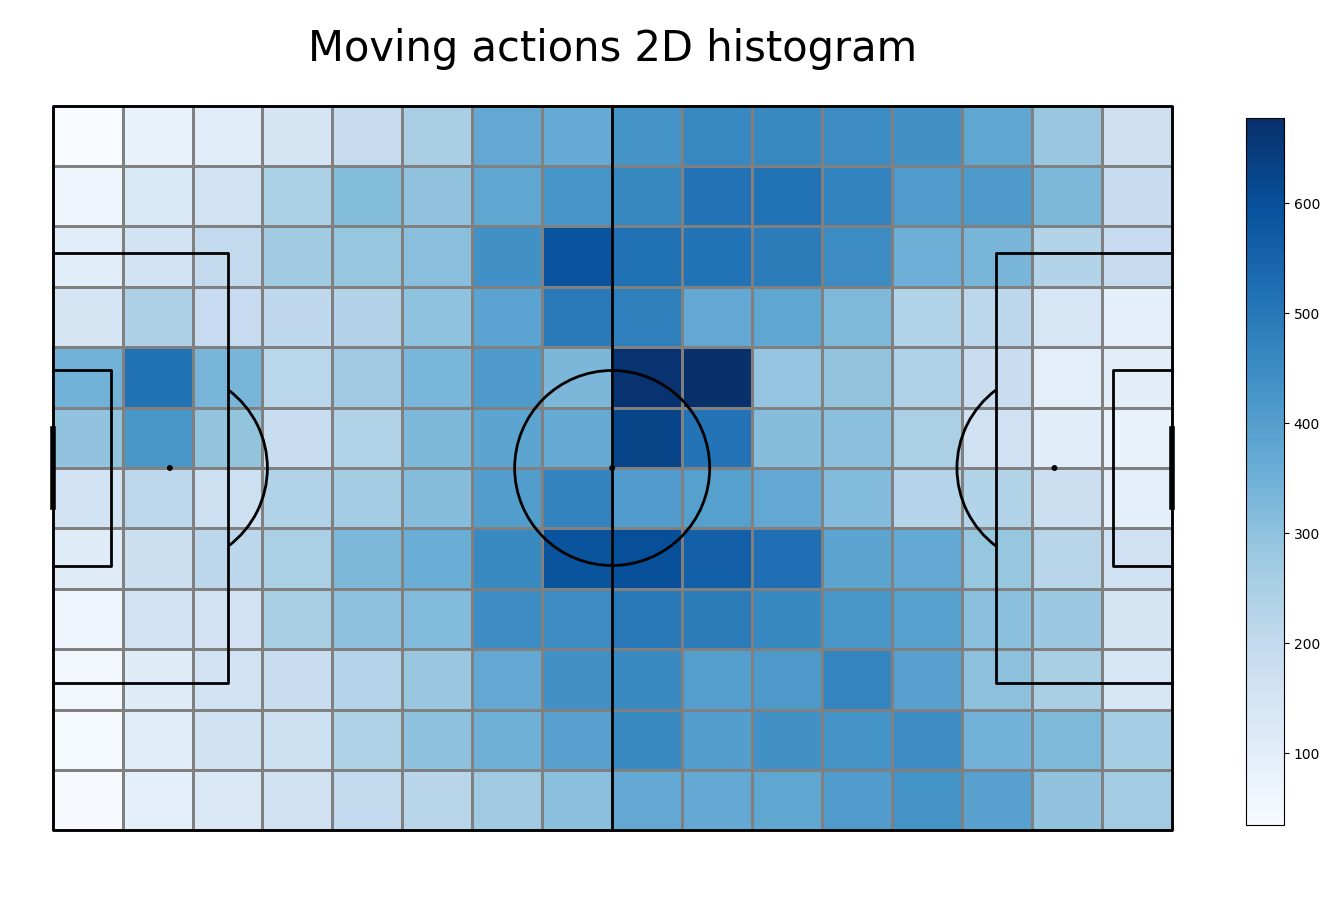

In [21]:
#create 2D histogram of these
pitch = Pitch(line_color='black',pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
move = pitch.bin_statistic(move_df.x_start, move_df.y_start, statistic='count', bins=(16, 12), normalize=False)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(move, cmap='Blues', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Moving actions 2D histogram', fontsize = 30)
plt.show()
#get the array
move_count = move["statistic"]

In [22]:
df_shot = df1[df1['type'] == 'Shot']
df_shot['location'] = df_shot['location'].apply(ast.literal_eval)
df_shot['x_start'] = df_shot['location'].apply(lambda x: x[0])
df_shot['y_start'] = df_shot['location'].apply(lambda x: x[1])

df_shot

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_78970/3179307053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shot['location'] = df_shot['location'].apply(ast.literal_eval)
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_78970/3179307053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shot['x_start'] = df_shot['location'].apply(lambda x: x[0])
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_78970/3179307053.py:4: SettingWithCopyWarning: 
A value is trying to

,Unnamed: 0,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,...,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,x_start,y_start
132917,132917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Werder Bremen,176,00:06:48.773,Shot,NaN,100.4,35.1
132918,132918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Bayer Leverkusen,904,00:07:40.953,Shot,True,114.6,33.5
132919,132919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Werder Bremen,176,00:11:08.471,Shot,NaN,106.2,55.8
132920,132920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Bayer Leverkusen,904,00:13:16.073,Shot,NaN,113.9,47.4
132921,132921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Bayer Leverkusen,904,00:16:00.956,Shot,True,89.2,42.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133828,133828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,RB Leipzig,182,00:40:51.621,Shot,NaN,114.6,35.6
133829,133829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,RB Leipzig,182,00:40:52.851,Shot,True,111.7,30.5
133830,133830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Bayer Leverkusen,904,00:41:40.000,Shot,True,98.6,31.6
133831,133831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,RB Leipzig,182,00:45:01.632,Shot,NaN,99.0,59.6


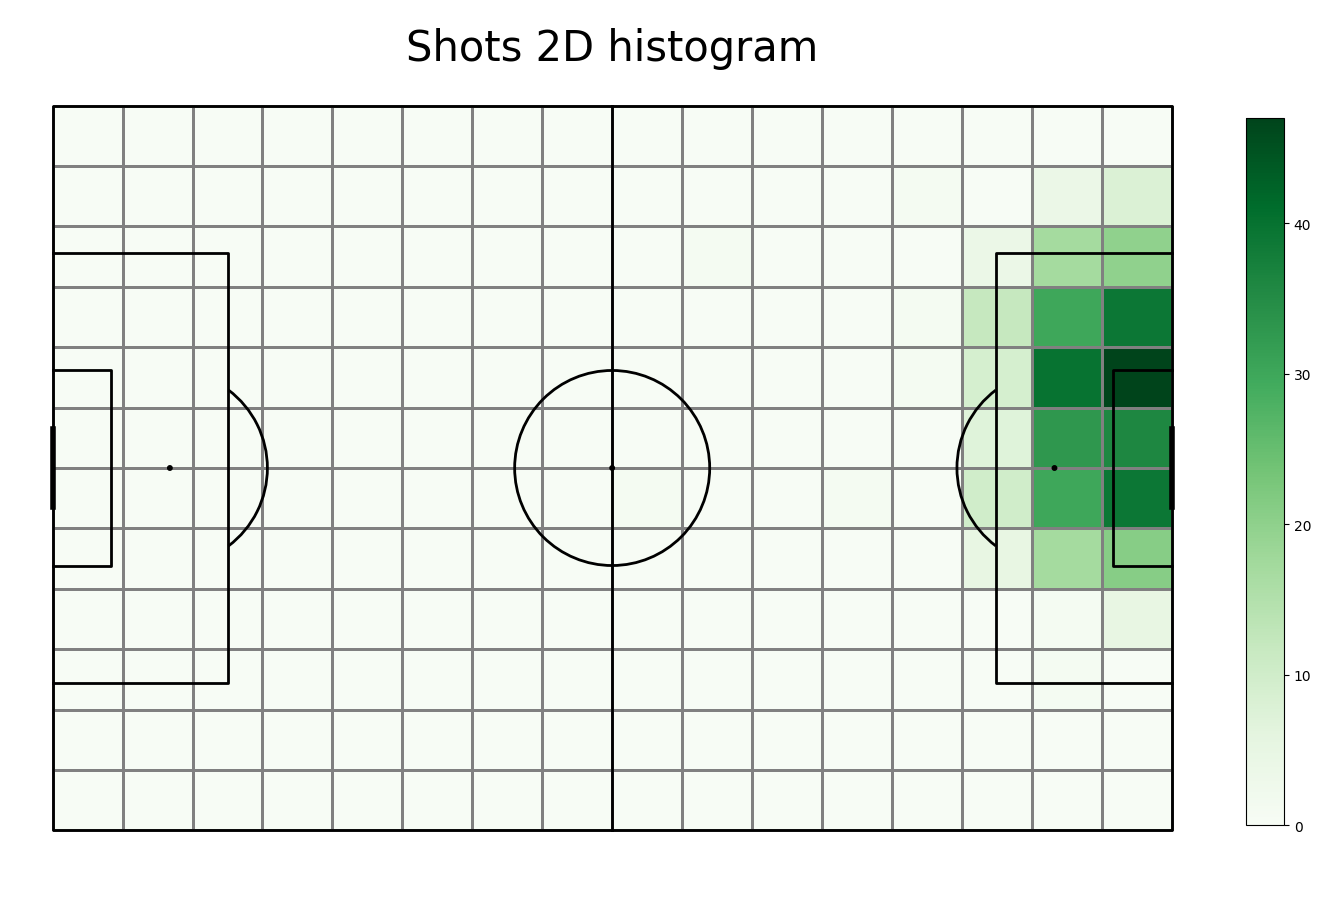

In [23]:
#create 2D histogram of these
shot = pitch.bin_statistic(df_shot.x_start, df_shot.y_start, statistic='count', bins=(16, 12), normalize=False)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(shot, cmap='Greens', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shots 2D histogram', fontsize = 30)
plt.show()

shot_count = shot["statistic"]

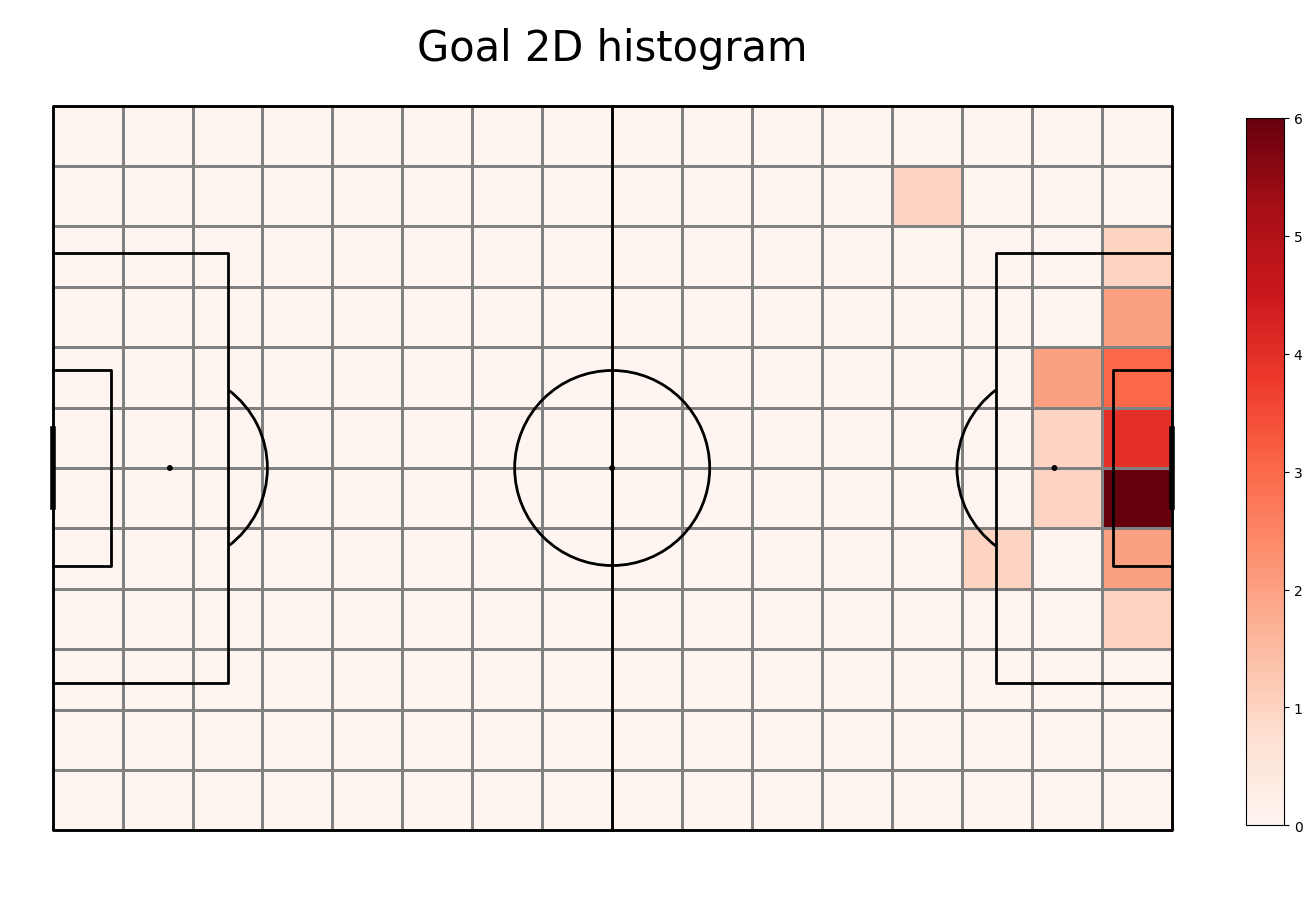

In [24]:
goal_df = df_shot[df_shot['shot_outcome'] == 'Goal']
goal = pitch.bin_statistic(goal_df.x_start, goal_df.y_start, statistic='count', bins=(16, 12), normalize=False)
goal_count = goal["statistic"]

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(goal, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goal 2D histogram', fontsize = 30)
plt.show()

In [25]:
goal_df

,Unnamed: 0,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,...,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,x_start,y_start
132924,132924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Bayer Leverkusen,904,00:24:27.217,Shot,NaN,108.0,40.0
132934,132934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Bayer Leverkusen,904,00:14:18.478,Shot,NaN,93.0,39.1
132936,132936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Bayer Leverkusen,904,00:22:25.400,Shot,NaN,93.5,40.1
132942,132942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Bayer Leverkusen,904,00:37:29.786,Shot,NaN,103.6,35.0
132943,132943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Bayer Leverkusen,904,00:44:25.079,Shot,NaN,106.4,48.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133815,133815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Bayer Leverkusen,904,00:23:04.554,Shot,NaN,113.6,43.8
133817,133817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Bayer Leverkusen,904,00:34:03.174,Shot,NaN,112.9,40.4
133819,133819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,RB Leipzig,182,00:38:55.890,Shot,NaN,115.4,48.8
133823,133823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Bayer Leverkusen,904,00:18:20.496,Shot,NaN,104.8,45.4


In [26]:
goal_df[['player','minute','second']]

,player,minute,second
132924,Victor Okoh Boniface,24,27
132934,Granit Xhaka,59,18
132936,Florian Wirtz,67,25
132942,Florian Wirtz,82,29
132943,Florian Wirtz,89,25
...,...,...,...
133815,Jeremie Frimpong,23,4
133817,Jonathan Tah,34,3
133819,Daniel Olmo Carvajal,38,55
133823,Florian Wirtz,63,20


In [27]:
goal_count

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 4.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 6.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

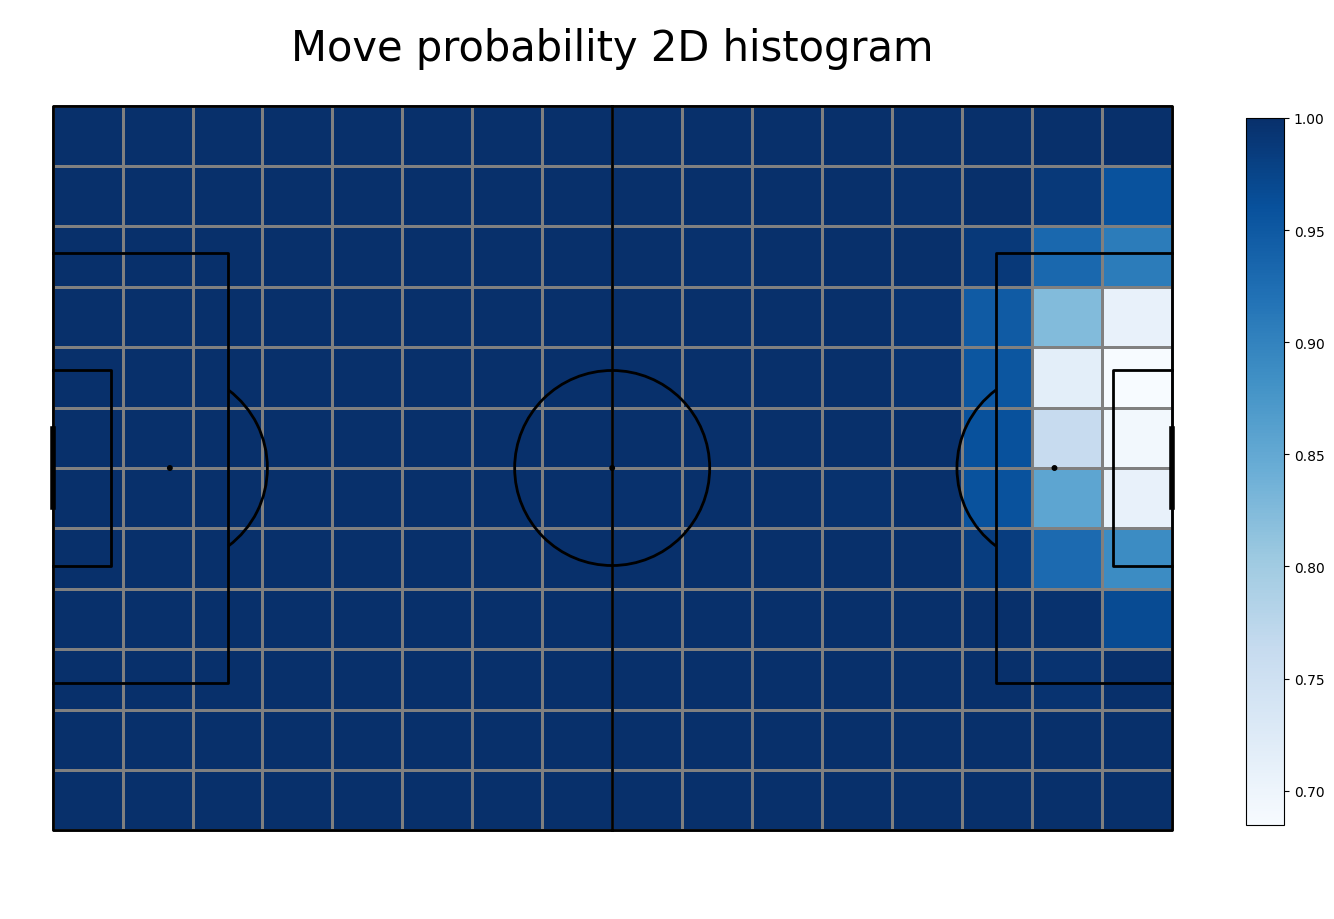

In [28]:
move_probability = move_count/(move_count+shot_count)
#plotting it
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
move["statistic"] = move_probability
pcm  = pitch.heatmap(move, cmap='Blues', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Move probability 2D histogram', fontsize = 30)
plt.show()

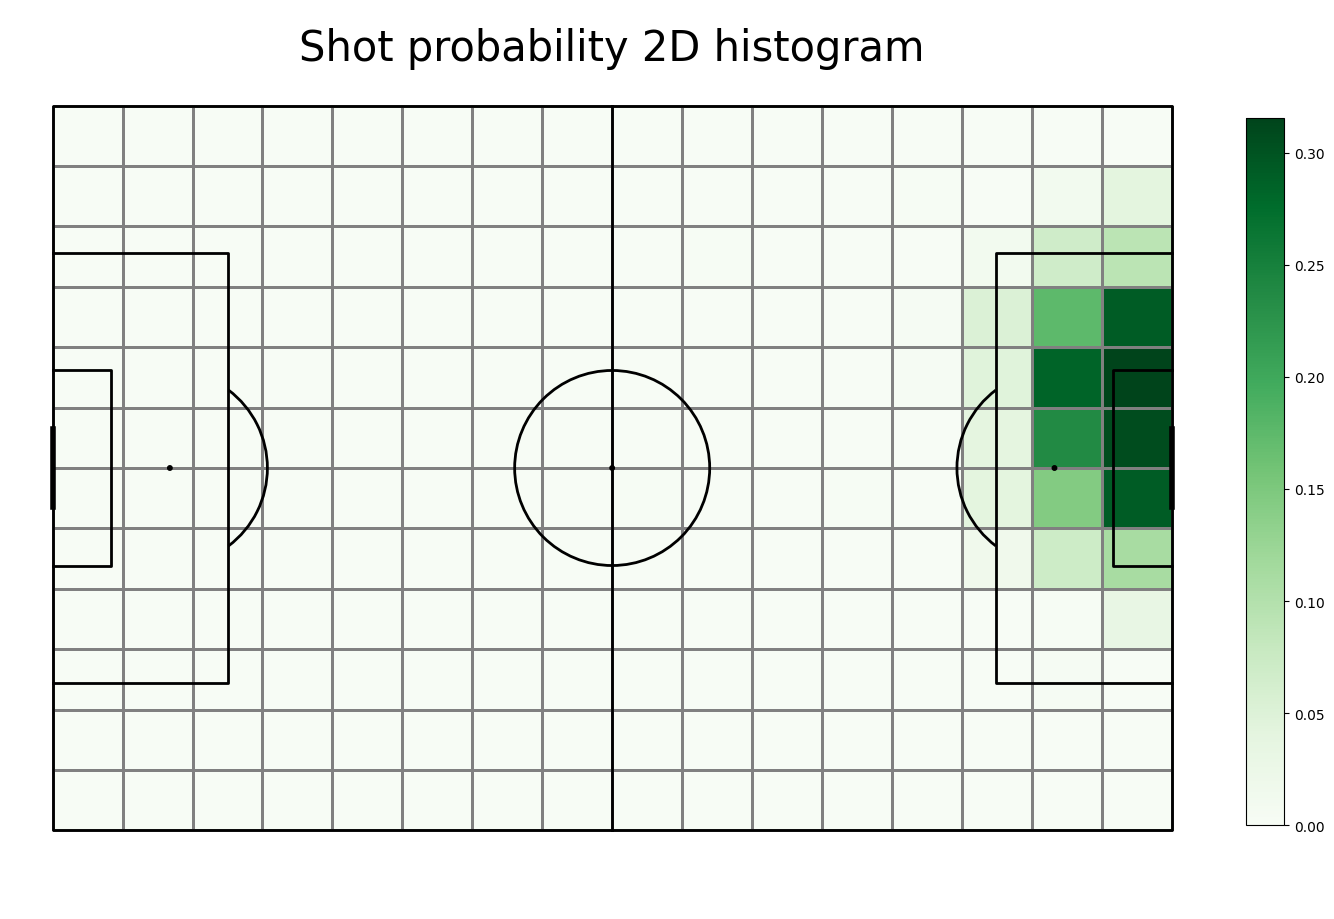

In [29]:
shot_probability = shot_count/(move_count+shot_count)
#plotting it
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
shot["statistic"] = shot_probability
pcm  = pitch.heatmap(shot, cmap='Greens', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shot probability 2D histogram', fontsize = 30)
plt.show()

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_78970/1173137835.py:1: RuntimeWarning: invalid value encountered in divide
  goal_probability = goal_count/shot_count


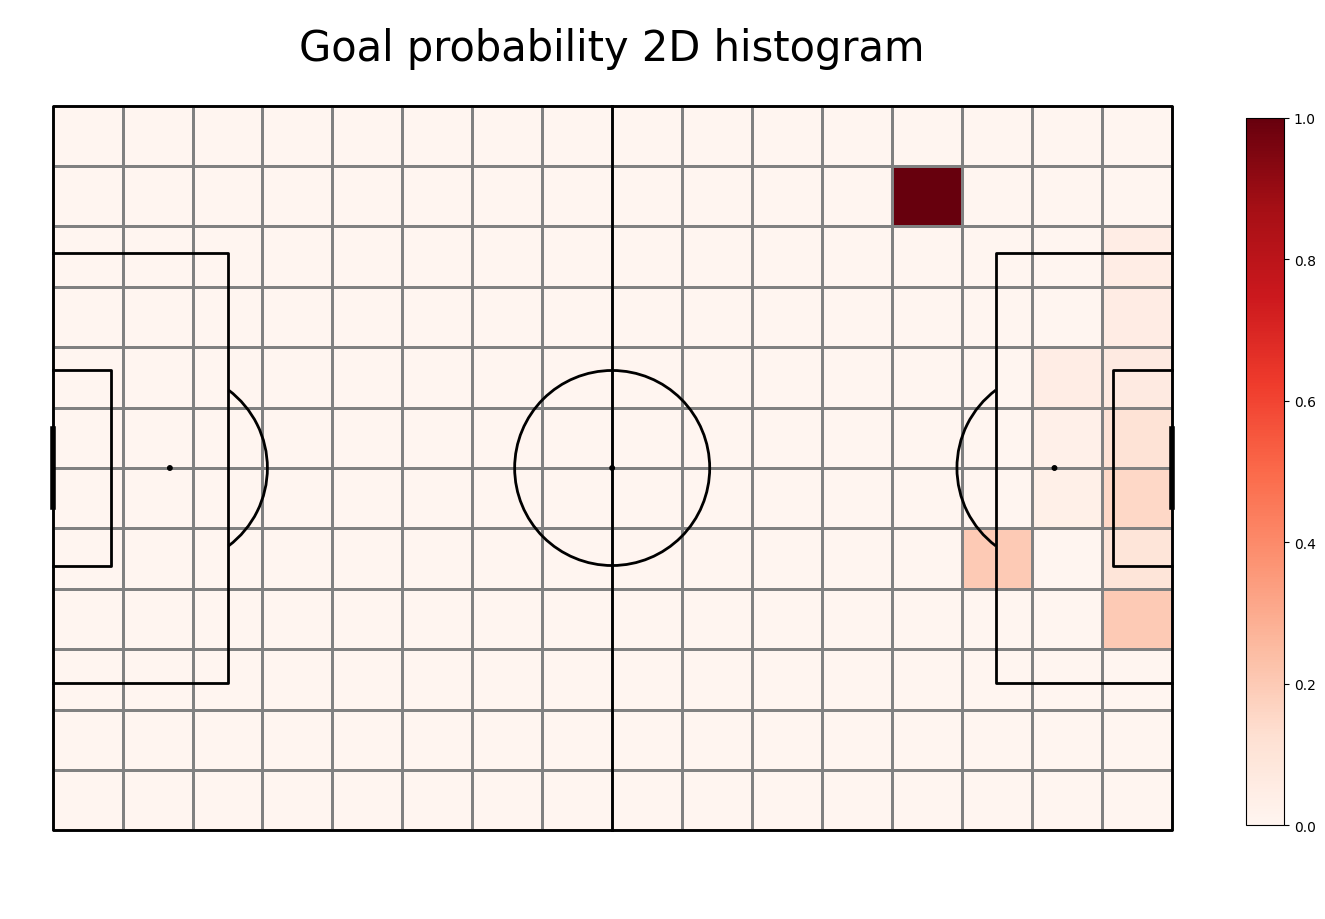

In [30]:
goal_probability = goal_count/shot_count
goal_probability[np.isnan(goal_probability)] = 0
#plotting it
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
goal["statistic"] = goal_probability
pcm  = pitch.heatmap(goal, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goal probability 2D histogram', fontsize = 30)
plt.show()

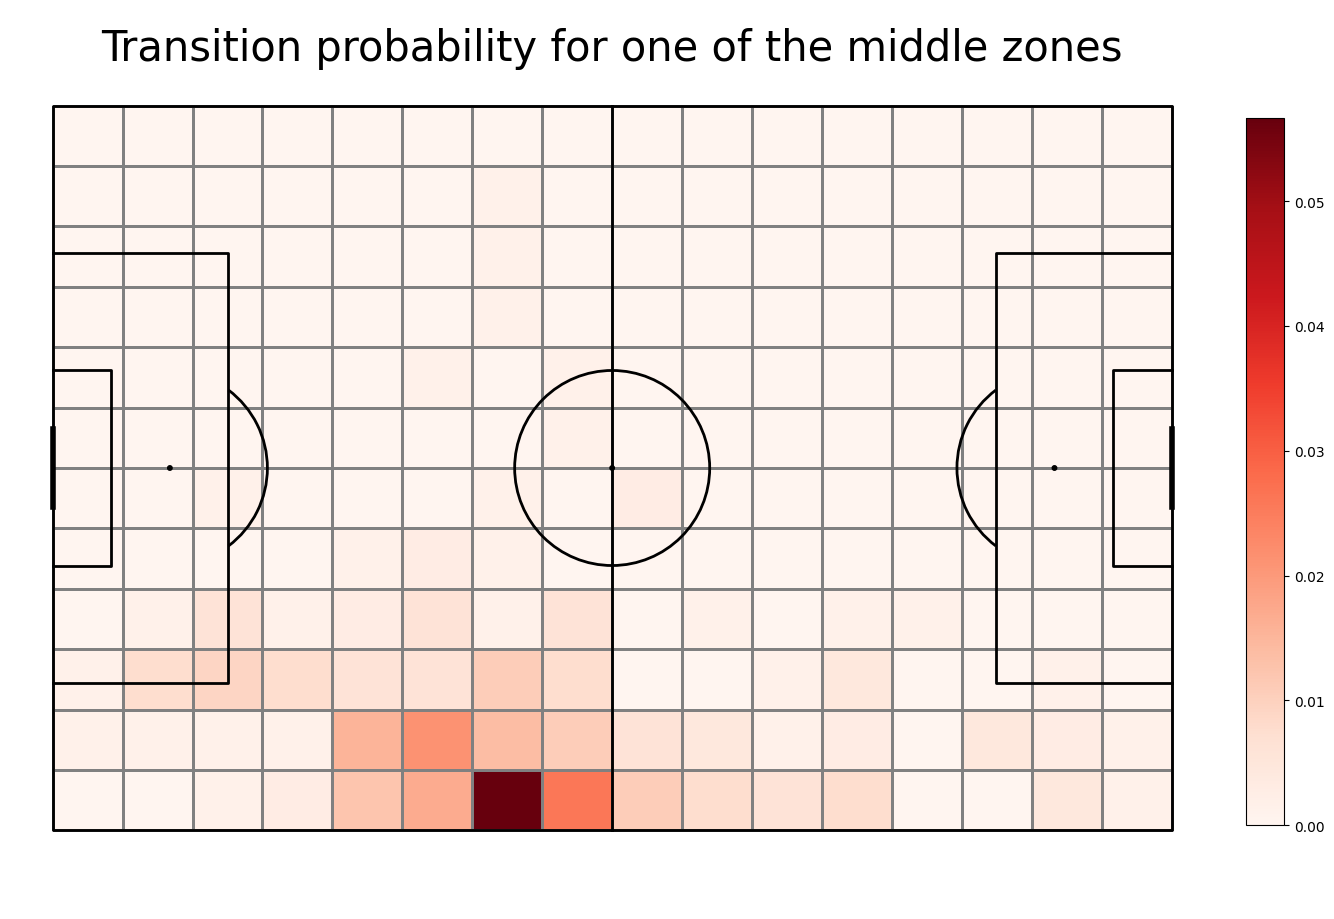

In [31]:
# Function to convert bin numbers to tuples
def get_bin_tuple(x, y):
    bin_numbers = binned_statistic_2d(np.ravel(x), np.ravel(y), 
                                      values=None, statistic="count", 
                                      bins=(16, 12), range=[[0, 105], [0, 68]], 
                                      expand_binnumbers=True)[3]
    return tuple([int(i) for i in bin_numbers])

# Adding start and end sectors
move_df["start_sector"] = move_df.apply(lambda row: get_bin_tuple(row.x_start, row.y_start), axis=1)
move_df["end_sector"] = move_df.apply(lambda row: get_bin_tuple(row.x_end, row.y_end), axis=1)

# Group by start sector and count occurrences
df_count_starts = move_df.groupby("start_sector").size().reset_index(name='count_starts')

# Initialize list for transition matrices
transition_matrices = []

# Create transition matrices
for i, row in df_count_starts.iterrows():
    start_sector = row['start_sector']
    count_starts = row['count_starts']
    
    # Get all events that started in this sector
    this_sector = move_df.loc[move_df["start_sector"] == start_sector]
    
    # Group by end sector and count occurrences
    df_cound_ends = this_sector.groupby(["end_sector"]).size().reset_index(name='count_ends')
    
    # Initialize the transition matrix for this start sector
    T_matrix = np.zeros((12, 16))
    
    # Populate the transition matrix
    for j, row2 in df_cound_ends.iterrows():
        end_sector = row2["end_sector"]
        value = row2["count_ends"]
        # Convert 1-based index to 0-based index
        row_idx = end_sector[1] - 1
        col_idx = end_sector[0] - 1
        # Ensure indices are within bounds
        if 0 <= row_idx < 12 and 0 <= col_idx < 16:
            T_matrix[row_idx][col_idx] = value
    
    # Normalize the transition matrix
    T_matrix = T_matrix / count_starts
    
    # Append the transition matrix to the list
    transition_matrices.append(T_matrix)

#let's plot it for the zone [1,1] - left down corner
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#Change the index here to change the zone.
goal["statistic"] = transition_matrices[90]
pcm  = pitch.heatmap(goal, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Transition probability for one of the middle zones', fontsize = 30)
plt.show()

ValueError: x and y must be the same size

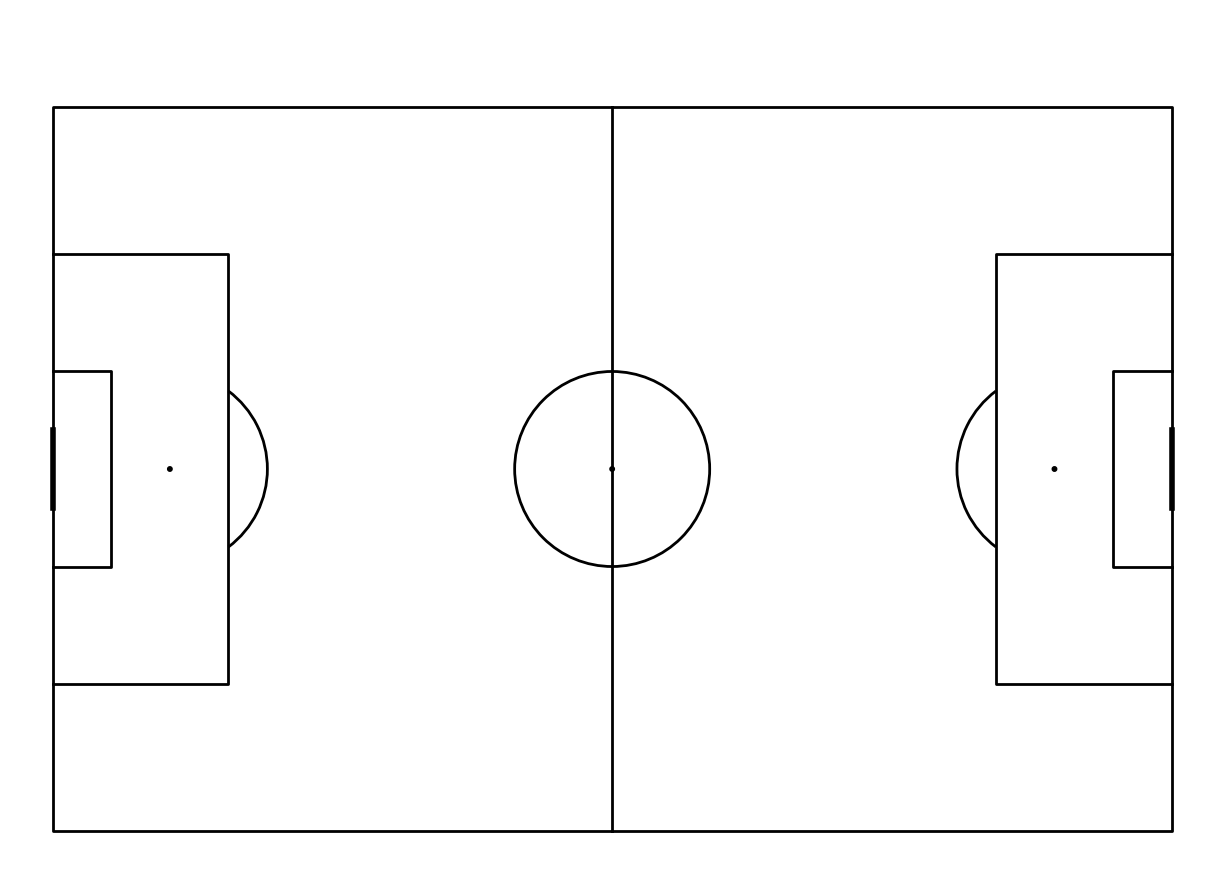

In [32]:
# Create a sample transition_matrices list for demonstration purposes
# Replace this with your actual transition matrices data
transition_matrices = [np.random.rand(12, 16) for _ in range(5)]  # Example data

# Convert transition matrices list to numpy array
transition_matrices_array = np.array(transition_matrices)

# Initialize xT matrix
xT = np.zeros((12, 16))

# Iteratively calculate xT
for i in range(5):
    shoot_expected_payoff = goal_probability * shot_probability
    move_expected_payoff = move_probability * np.sum(transition_matrices_array * xT, axis=0)
    xT = shoot_expected_payoff + move_expected_payoff

    # Plot the xT matrix
    pitch = Pitch(line_color='black', pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder=2)
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.01, title_space=0, endnote_space=0)
    
    # Create x and y positions that match the heatmap bins
    x_positions = np.linspace(0, 105, 16)
    y_positions = np.linspace(0, 68, 12)

    # Create a bin_statistic object with the xT values
    xT_statistic = pitch.bin_statistic(x=x_positions, y=y_positions, values=xT.flatten(), statistic='sum', bins=(16, 12), normalize=False)

    pcm = pitch.heatmap(xT_statistic, cmap='Oranges', edgecolor='grey', ax=ax['pitch'])
    labels = pitch.label_heatmap(xT_statistic, color='blue', fontsize=9,
                                 ax=ax['pitch'], ha='center', va='center', str_format="{0:,.2f}", zorder=3)
    
    # Add colorbar to the plot
    ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
    cbar = plt.colorbar(pcm, cax=ax_cbar)
    txt = 'Expected Threat matrix after ' + str(i+1) + ' moves'
    fig.suptitle(txt, fontsize=30)
    plt.show()

In [48]:
T_matrix = np.zeros((12, 16))
T_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

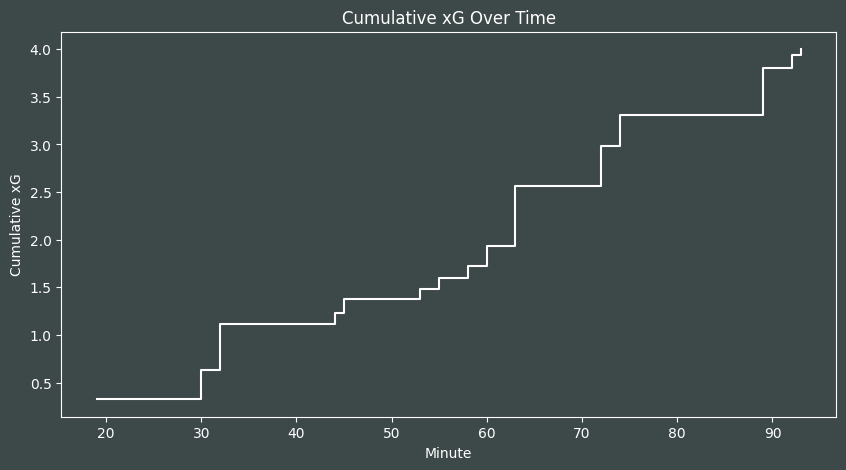

In [62]:
# importing necessary libraries
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings
from statsbombpy import sb 
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

a = sb.events(match_id=18244)
a = a[['team','type','minute','location','shot_end_location','shot_outcome']]
shots= a[((a['team']=='Real Madrid')&(a['type']=='Shot'))].reset_index()
# Extract shot coordinates and convert to standard pitch coordinates
shots["X"] = shots["location"].apply(lambda loc: (120 - loc[0]) * 105 / 120)
shots["Y"] = shots["location"].apply(lambda loc: loc[1] * 68 / 100)
shots["C"] = shots["location"].apply(lambda loc: abs(loc[1] - 60) * 68 / 100)

# Calculate distance from goal
shots["Distance"] = np.sqrt(shots["X"]**2 + shots["C"]**2)

# Calculate angle to goal
shots["Angle"] = np.where(
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)) > 0,
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)),
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)) + np.pi
)

# Determine if the shot was a goal
shots["Goal"] = shots["shot_outcome"].apply(lambda outcome: 1 if outcome == 'Goal' else 0).astype(object)


#creating extra variables
shots["X2"] = shots['X']**2
shots["C2"] = shots['C']**2
shots["AX"]  = shots['Angle']*shots['X']

# list the model variables you want here
model_variables = ['Angle','Distance']
model=''
for v in model_variables[:-1]:
    model = model  + v + ' + '
model = model + model_variables[-1]

#fit the model
test_model = smf.glm(formula="Goal ~ " + model, data=shots,
                           family=sm.families.Binomial()).fit()
#print summary
# print(test_model.summary())
b=test_model.params

#return xG value for more general model
def calculate_xG(sh):
   bsum=b[0]
   for i,v in enumerate(model_variables):
       bsum=bsum+b[i+1]*sh[v]
   xG = 1/(1+np.exp(bsum))
   return xG

#add an xG to my dataframe
xG=shots.apply(calculate_xG, axis=1)
shots = shots.assign(xG=xG)

#Create a 2D map of xG
pgoal_2d=np.zeros((68,68))
for x in range(68):
    for y in range(68):
        sh=dict()
        a = np.arctan(7.32 *x /(x**2 + abs(y-68/2)**2 - (7.32/2)**2))
        if a<0:
            a = np.pi + a
        sh['Angle'] = a
        sh['Distance'] = np.sqrt(x**2 + abs(y-68/2)**2)
        sh['D2'] = x**2 + abs(y-68/2)**2
        sh['X'] = x
        sh['AX'] = x*a
        sh['X2'] = x**2
        sh['C'] = abs(y-68/2)
        sh['C2'] = (y-68/2)**2

        pgoal_2d[x,y] =  calculate_xG(sh)

# Calculate the cumulative sum of the 'xG' column
shots['cumulative_xG'] = shots['xG'].cumsum()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
fig.set_facecolor("#3d4849")
ax.patch.set_facecolor("#3d4849")

# Plot cumulative xG using a step plot
ax.step(x=shots['minute'], y=shots['cumulative_xG'], where='post', color='white')

# Customize the plot appearance
plt.xticks(color='white')
plt.yticks(color='white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set labels and title
ax.set_xlabel('Minute', color='white')
ax.set_ylabel('Cumulative xG', color='white')
ax.set_title('Cumulative xG Over Time', color='white')

# Show the plot
plt.show()